In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numba as nb
import charges as charges
import plotting as plotting
from itertools import combinations

In [31]:
high_temp = 50
low_temp = 0.1
steps = 100
linear = np.linspace(high_temp, low_temp, steps)

In [32]:
geometric = np.geomspace(high_temp,low_temp,steps)

In [33]:
# exponential = np.logspace(-9,0,steps, base=2)
diff = high_temp/steps
print(diff)

0.5


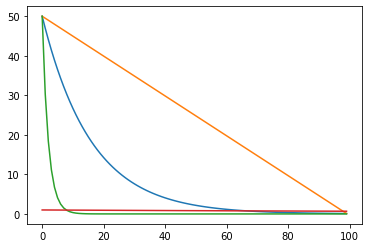

In [34]:
x = np.linspace(low_temp,high_temp,steps)
plt.figure()
plt.plot(geometric)
plt.plot(linear)
# plt.scatter(x,0.001**x, marker=2)
plt.plot([high_temp * np.exp(-diff*x) for x in range(steps)])
plt.plot(high_temp ** (np.array(range(steps))*-0.001))
plt.show()

In [35]:
# np.exp(np.arange(low_temp, high_temp)*-0.001) * high_temp

In [36]:
# [high_temp * np.exp(-0.001*x) for x in range(steps)]

In [37]:
# [high_temp * np.exp(-0.001*x) for x in range(steps)]

In [38]:
# plt.plot([high_temp * np.exp(-0.001*x) for x in range(10000)])

In [39]:
p1 = np.array([1,1])
p2 = np.array([2,2])
delta_x = np.abs(p1[0] - p2[0])
delta_y = np.abs(p1[1] - p2[1])
opp_angle = math.radians(90-math.degrees(math.atan(delta_y/delta_x)))
opp_x = math.sin(math.radians((opp_angle)))

In [40]:
arr_2d = np.vstack(([1,2,3,4,5],[10,20,30,40,50])).T
arr_2d

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40],
       [ 5, 50]])

In [41]:
a1, a2 = arr_2d, arr_2d
m1,n1 = a1.shape
m2,n2 = a2.shape
out = np.zeros((m1,m2,n1+n2),dtype=int)
out[:,:,:n1] = a1[:,None,:]
out[:,:,n1:] = a2
out.shape = (m1*m2,-1)
out

array([[ 1, 10,  1, 10],
       [ 1, 10,  2, 20],
       [ 1, 10,  3, 30],
       [ 1, 10,  4, 40],
       [ 1, 10,  5, 50],
       [ 2, 20,  1, 10],
       [ 2, 20,  2, 20],
       [ 2, 20,  3, 30],
       [ 2, 20,  4, 40],
       [ 2, 20,  5, 50],
       [ 3, 30,  1, 10],
       [ 3, 30,  2, 20],
       [ 3, 30,  3, 30],
       [ 3, 30,  4, 40],
       [ 3, 30,  5, 50],
       [ 4, 40,  1, 10],
       [ 4, 40,  2, 20],
       [ 4, 40,  3, 30],
       [ 4, 40,  4, 40],
       [ 4, 40,  5, 50],
       [ 5, 50,  1, 10],
       [ 5, 50,  2, 20],
       [ 5, 50,  3, 30],
       [ 5, 50,  4, 40],
       [ 5, 50,  5, 50]])

In [42]:
particles = arr_2d
def euclidean_vec(combs):
    """ Compute the euclidean distance between two points
    """

    return np.sqrt((combs[:,0]- combs[:,2])**2 + (combs[:,1]- combs[:,3])**2)
    # return np.linalg.norm(p2 - p1)

def evaluate_configuration_fast(particles):
    """No idea if this is acc faster."""

    # generate combinations
    m, n = particles.shape
    comb = np.zeros((m, m, n + n), dtype=float)
    comb[:, :, :n] = particles[:, None, :]
    comb[:, :, n:] = particles
    comb.shape = (m * m, -1) # shape is 4 columns w len(particles) rows
    # now we also get p1 -p1 combinations, but
    # their inter-particle distance is 0, so we can ignore that fact
    d = euclidean_vec(comb)
    return 1/np.sum(d[d != 0])

def euclidean(p1, p2):
    """ Compute the euclidean distance between two points
    """
    return np.linalg.norm(p2 - p1)

def evaluate_configuration(particles):
    """ Calculate the total energy of the current configuration
    """
    total = 0
    for i, j in list(combinations(range(len(particles)), 2)):
        p1, p2 = particles[i], particles[j]
        total += 1 / euclidean(p1, p2)

    return total

In [43]:
print(evaluate_configuration_fast(particles))
print(evaluate_configuration(particles))

0.0024875929755249727
0.6384821970514096


In [44]:
step_size = 0.01
rng = np.random.default_rng(None)
delta = rng.uniform(-step_size, step_size, size = 2)
delta

array([ 0.00257948, -0.0043617 ])

---------------


In [45]:
import matplotlib.cm as cm

def plot_ez(init_points, res):
    points = res

    theta = np.linspace(0, 2 * np.pi, 150)
    a = 1 * np.cos(theta)
    b = 1 * np.sin(theta)

    fig, ax = plt.subplots(1, figsize = (8,8))
    ax.plot(a, b, color='black')
    # plotpoints = []
    # for p in points:
    colors = list(cm.rainbow(np.linspace(0, 1, len(points))))
    for i in range(len(points)):
        ax.scatter(init_points[i,0], init_points[i,1],color=colors[i])
        ax.scatter(points[i,0], points[i,1],s=100,marker='X',color=colors[i])
    # scatter = ax.scatter(init_points[:,0], init_points[:,1], color='black',label='before')
    # scatter = ax.scatter(points[:,0], points[:,1], color='red',s=100,marker='x', label = 'black')
    plt.title("x is after")
    ax.set_aspect(1)
    # plt.legend()

0.625852916440996
1.2539396062586303
1.2558553608679288
1.2574081127194252
1.2588549008029644
1.2557524944873448
1.2550506240234471
1.2565008628936636
1.2567865089866075
1.2645432608669418
1.2571346382575066
1.2557512050794355
1.2481650457438496
1.248015132362266
1.2510686769528951
1.2450642216732841
1.254994712966266
1.2617052157021893
1.257648419912183
1.2609692671974797
1.2668591615727853
1.2674878101256803
1.2680249011256806
1.273679392807004
1.2711021743681497
1.2804016126530557
1.291539965550042
1.2838961023530622
1.2781517922340668
1.2838773060440258
1.2884067702091053
1.2885294118515018
1.2805177562655006
1.282466290739266
1.2885158868152455
1.289528901243662
1.2864657429248851
1.2867034213011403
1.2872379358940826
1.2826779113886353
1.2875187290388608
1.2819312850192623
1.2798343750865906
1.2869771800469068
1.2910247421059664
1.2963247269039901
1.2866934082263304
1.2887864723335114
1.2830817562340713
1.2839859458390146
1.2825556343863551
1.2810257573178823
1.2802289087906433
1

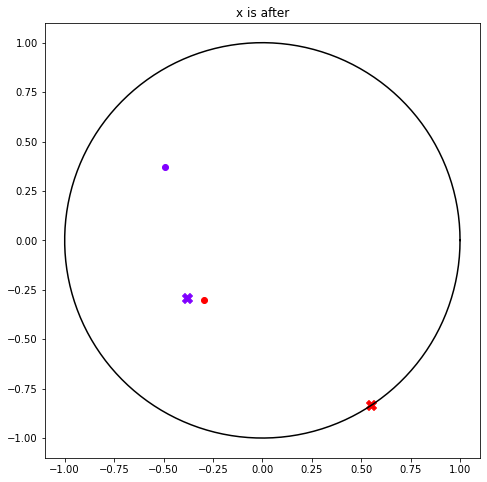

In [46]:


my_charge = charges.Charges(2,1)
init_points = my_charge.generate_points(2)
# print(init_points)
# my_charge.evaluate_configuration()
# my_charge.evaluate_configuration_fast() # does not work, div by 0
colors = cm.rainbow(np.linspace(0, 1, len(init_points)))
res = my_charge.iterate_SA_optimize(0.001,50,30_000,'linear', False)
plot_ez(init_points,res)
# evaluate_configuration_fast(res)

# m, n = res.shape
# comb = np.zeros((m, m, n + n), dtype=float)
# comb[:, :, :n] = res[:, None, :]
# comb[:, :, n:] = res
# comb.shape = (m * m, -1) # shape is 4 columns w len(particles) rows
# print(comb)
# # now we also get p1 -p1 combinations, but
# # their inter-particle distance is 0, so we can ignore that fact
#
# 1/np.sum(euclidean_vec(comb))


In [47]:
print(evaluate_configuration_fast(init_points))
print(evaluate_configuration_fast(res))

0.7173250398485798
0.4632556379590947


In [48]:
m, n = particles.shape
comb = np.zeros((m, m, n + n), dtype=int)
comb[:, :, :n] = particles[:, None, :]
comb[:, :, n:] = particles
comb.shape = (m * m, -1)

In [49]:
combs = comb

In [50]:
np.sqrt((combs[:,0]- combs[:,2])**2 + (combs[:,1]- combs[:,3])**2)

array([ 0.        , 10.04987562, 20.09975124, 30.14962686, 40.19950248,
       10.04987562,  0.        , 10.04987562, 20.09975124, 30.14962686,
       20.09975124, 10.04987562,  0.        , 10.04987562, 20.09975124,
       30.14962686, 20.09975124, 10.04987562,  0.        , 10.04987562,
       40.19950248, 30.14962686, 20.09975124, 10.04987562,  0.        ])

In [51]:
import pandas as pd

In [52]:
# data = pd.read_csv('logged_data/2_linear_30000.csv', sep=',')

In [53]:
my_data = np.loadtxt('logged_data/2_linear_30000.csv', delimiter=',',skiprows=1)

In [54]:
my_data

array([0.62585292, 1.25393961, 1.25585536, ..., 1.86596533, 1.86596533,
       1.85302255])

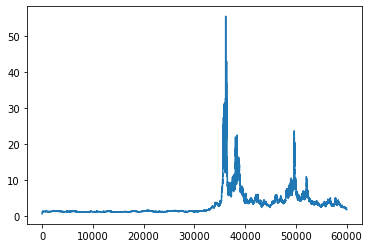

In [57]:
plt.plot(my_data)